# Stock Market Prediction using Machine Learning and Deep Learning

### Problem Statement

Predicting the stock prices based on the historical data using machine learning techniques like Moving Avergae, Linear Regression and k-Nearest Neighbors and Deep learning algo LSTM.

Data is gather  yahoo finance for past 5years and we will be using Adj Close as a input feature and predict the on validation dataset.

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# import warnings
# warnings.filterwarnings('ignore')
import datetime as dt
import yfinance as yf

### Getting Data

In [ ]:
import yfinance as yf
import datetime as dt
tickers = ['TCS.NS', 'TRIDENT.NS','TATAMOTORS.NS']
# tickers = ['20MICRONS.NS']
start = dt.datetime.today() - dt.timedelta(15 * 365)
end = dt.datetime.today()

for i in tickers:
    data = yf.download(i,period='max')
    data.to_csv(f'{i}.csv', index=True)
    
    

We will implement our models/techniques on different 3 stocks based on market size.

In [ ]:
tcs = pd.read_csv('TCS.NS.csv')
tata = pd.read_csv('TATAMOTORS.NS.csv')
trident = pd.read_csv('TRIDENT.NS.csv')

In [ ]:
tcs['Date'].max

### Moving Average

The predicted closing price for each day will be the average of a set of previously observed values. Instead of using the simple average, we will be using the moving average technique which uses the latest set of values for each prediction. In other words, for each subsequent step, the predicted values are taken into consideration while removing the oldest observed value from the set. Here is a simple figure that will help you understand this with more clarity.

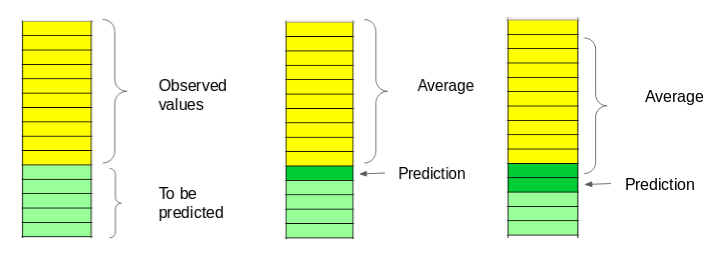

#### On TCS

Let's implement Moving Average on TCS first.

In [ ]:
tcs.index=tcs['Date']

tcs_df = tcs.sort_index(ascending=True, axis=0)
tcs_new = pd.DataFrame(index=range(0, len(tcs)), columns=['Date', 'Adj Close'])

for i in range(0,len(tcs_df)):
    tcs_new['Date'][i] = tcs_df['Date'][i]
    tcs_new['Adj Close'][i] = tcs_df['Adj Close'][i]

#splitting training and validation dataset
train = tcs_new[:990]
valid = tcs_new[990:]

#shapes of training set
print(train.shape)

#shapes of valid set
print(valid.shape)

preds = []
for i in range(0,valid.shape[0]):
    a = train['Adj Close'][len(train)-246+i:].sum() + sum(preds)
    b = a/246
    preds.append(b)
    
# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Adj Close'])-preds),2)))
print('\nRMSE value on validation set:')
print(rms)

#plot
valid=valid.copy()
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.title('Predicted adj close price vs actual close price on TCS ');

#### On TataMotors

In [ ]:
tata.index=tcs['Date']

tata_df = tata.sort_index(ascending=True, axis=0)
tata_new = pd.DataFrame(index=range(0, len(tata)), columns=['Date', 'Adj Close'])

for i in range(0,len(tata_df)):
    tata_new['Date'][i] = tata_df['Date'][i]
    tata_new['Adj Close'][i] = tata_df['Adj Close'][i]

#splitting training and validation dataset
train = tata_new[:990]
valid = tata_new[990:]

#shapes of training set
print(train.shape)

#shapes of valid set
print(valid.shape)

preds = []
for i in range(0,valid.shape[0]):
    a = train['Adj Close'][len(train)-246+i:].sum() + sum(preds)
    b = a/246
    preds.append(b)
    
# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Adj Close'])-preds),2)))
print('\nRMSE value on validation set:')
print(rms)

#plot
valid = valid.copy()
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.title('Predicted adj close price vs actual close price on Tata Motors ');

#### On Trident

In [ ]:
trident.index=trident['Date']

trident_df = trident.sort_index(ascending=True, axis=0)
trident_new = pd.DataFrame(index=range(0, len(trident)), columns=['Date', 'Adj Close'])

for i in range(0,len(trident_df)):
    trident_new['Date'][i] = trident_df['Date'][i]
    trident_new['Adj Close'][i] = trident_df['Adj Close'][i]

#splitting training and validation dataset
train = trident_new[:990]
valid = trident_new[990:]

#shapes of training set
print(train.shape)

#shapes of valid set
print(valid.shape)

preds = []
for i in range(0,valid.shape[0]):
    a = train['Adj Close'][len(train)-246+i:].sum() + sum(preds)
    b = a/246
    preds.append(b)
    
# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Adj Close'])-preds),2)))
print('\nRMSE value on validation set:')
print(rms)

#plot
valid = valid.copy()
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.title('Predicted adj close price vs actual close price on Trident ');

#### Inference

The RMSE value is minimum but the results are not very promising (as you can gather from the plot). The predicted values are of the same range as the observed values in the train set (there is an increasing trend initially and then a slow decrease).

### k-Nearest Neighbors

Another interesting ML algorithm that one can use here is kNN (k nearest neighbours). Based on the independent variables, kNN finds the similarity between new data points and old data points. 


#### On TCS

In [ ]:
#create features

tcs_new['Date'] = tcs_new['Date'].astype('datetime64[ns]')
tcs_new["Year"] = tcs_new.Date.dt.year
tcs_new["Month"] = tcs_new.Date.dt.month
tcs_new["Day"] = tcs_new.Date.dt.day
tcs_new["DayOfWeek"] = tcs_new.Date.dt.dayofweek
tcs_new["DayOfYear"] = tcs_new.Date.dt.dayofyear

tcs_new.drop('Date', axis=1,inplace=True)

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

#split into train and validation
train = tcs_new[:990]
valid = tcs_new[990:]

x_train = train.drop('Adj Close', axis=1)
y_train = train['Adj Close']
x_valid = valid.drop('Adj Close', axis=1)
y_valid = valid['Adj Close']

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)
print('Model Fitted!')

#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print('RMSE is',rms)

#plot
valid = valid.copy()
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Adj Close', 'Predictions']])
plt.plot(train['Adj Close']);
plt.title('Predicted adj close price vs actual close price on TCS ');


#### On TataMotors

In [ ]:
#create features

tata_new['Date'] = tata_new['Date'].astype('datetime64[ns]')
tata_new["Year"] = tata_new.Date.dt.year
tata_new["Month"] = tata_new.Date.dt.month
tata_new["Day"] = tata_new.Date.dt.day
tata_new["DayOfWeek"] = tata_new.Date.dt.dayofweek
tata_new["DayOfYear"] = tata_new.Date.dt.dayofyear

tata_new.drop('Date', axis=1,inplace=True)

In [ ]:
#split into train and validation
train = tata_new[:990]
valid = tata_new[990:]

x_train = train.drop('Adj Close', axis=1)
y_train = train['Adj Close']
x_valid = valid.drop('Adj Close', axis=1)
y_valid = valid['Adj Close']

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)
print('Model Fitted!')

#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print('RMSE is',rms)

#plot
valid = valid.copy()
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Adj Close', 'Predictions']])
plt.plot(train['Adj Close']);
plt.title('Predicted adj close price vs actual close price on Tata Motors ');


#### On Trident

In [ ]:
#create features

trident_new['Date'] = trident_new['Date'].astype('datetime64[ns]')
trident_new["Year"] = trident_new.Date.dt.year
trident_new["Month"] = trident_new.Date.dt.month
trident_new["Day"] = trident_new.Date.dt.day
trident_new["DayOfWeek"] = trident_new.Date.dt.dayofweek
trident_new["DayOfYear"] = trident_new.Date.dt.dayofyear

trident_new.drop('Date', axis=1,inplace=True)

In [ ]:
#split into train and validation
train = trident_new[:990]
valid = trident_new[990:]

x_train = train.drop('Adj Close', axis=1)
y_train = train['Adj Close']
x_valid = valid.drop('Adj Close', axis=1)
y_valid = valid['Adj Close']

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)
print('Model Fitted!')

#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print('RMSE is',rms)

#plot
valid = valid.copy()
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Adj Close', 'Predictions']])
plt.plot(train['Adj Close']);
plt.title('Predicted adj close price vs actual close price on Trident ');

### Linear Regression

The most basic machine learning algorithm that can be implemented on this data is linear regression. The linear regression model returns an equation that determines the relationship between the independent variables and the dependent variable.



#### On TCS

In [ ]:
#split into train and validation
train = tcs_new[:990]
valid = tcs_new[990:]

x_train = train.drop('Adj Close', axis=1)
y_train = train['Adj Close']
x_valid = valid.drop('Adj Close', axis=1)
y_valid = valid['Adj Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print('Model Fitted!')

#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print('RMSE is',rms)

#plot
valid = valid.copy()
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = tcs_new[990:].index
train.index = tcs_new[:990].index

plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']]);
plt.title('Predicted adj close price vs actual close price on TCS ');

#### On TATAMOTORS

In [ ]:
#split into train and validation
train = tata_new[:990]
valid = tata_new[990:]

x_train = train.drop('Adj Close', axis=1)
y_train = train['Adj Close']
x_valid = valid.drop('Adj Close', axis=1)
y_valid = valid['Adj Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print('Model Fitted!')

#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print('RMSE is',rms)

#plot
valid = valid.copy()
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = tata_new[990:].index
train.index = tata_new[:990].index

plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']]);
plt.title('Predicted adj close price vs actual close price on Tata Motors ');

#### On Trident

In [ ]:
#split into train and validation
train = trident_new[:990]
valid = trident_new[990:]

x_train = train.drop('Adj Close', axis=1)
y_train = train['Adj Close']
x_valid = valid.drop('Adj Close', axis=1)
y_valid = valid['Adj Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print('Model Fitted!')

#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print('RMSE is',rms)

#plot
valid = valid.copy()
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = trident_new[990:].index
train.index = trident_new[:990].index

plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']]);
plt.title('Predicted adj close price vs actual close price on Trident ');

### LSTM

LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is because LSTM is able to store past information that is important, and forget the information that is not. LSTM has three gates:

 - The input gate: The input gate adds information to the cell state

 - The forget gate: It removes the information that is no longer required by the model

 - The output gate: Output Gate at LSTM selects the information to be shown as output


#### On TCS

In [ ]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error
#creating dataframe
tcs_lstm = pd.DataFrame(index=range(0,len(tcs_df)),columns=['Date', 'Adj Close'])
for i in range(0,len(tcs_df)):
    tcs_lstm['Date'][i] = tcs_df['Date'][i]
    tcs_lstm['Adj Close'][i] = tcs_df['Adj Close'][i]

#setting index
tcs_lstm.index = tcs_lstm.Date
tcs_lstm.drop('Date', axis=1, inplace=True)


#creating train and test sets
dataset = tcs_lstm.values

train = dataset[0:990,:]
valid = dataset[990:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
print('Fitting Model')
#predicting 246 values, using past 60 from the train data
inputs = tcs_lstm[len(tcs_lstm) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

rms=np.sqrt(mean_squared_error(closing_price,valid))
print('RMSE is',rms)

#for plotting
train = tcs_lstm[:990]
valid = tcs_lstm[990:]
valid['Predictions'] = closing_price
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close','Predictions']]);
plt.title('Predicted adj close price vs actual close price on TCS ');


# V2 model

#### On TataMotors

In [ ]:
#creating dataframe
tata_lstm = pd.DataFrame(index=range(0,len(tata_df)),columns=['Date', 'Adj Close'])
for i in range(0,len(tata_df)):
    tata_lstm['Date'][i] = tata_df['Date'][i]
    tata_lstm['Adj Close'][i] = tata_df['Adj Close'][i]

#setting index
tata_lstm.index = tata_lstm.Date
tata_lstm.drop('Date', axis=1, inplace=True)


#creating train and test sets
dataset = tata_lstm.values

train = dataset[0:990,:]
valid = dataset[990:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
print('Fitting Model')
#predicting 246 values, using past 60 from the train data
inputs = tata_lstm[len(tata_lstm) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

rms=np.sqrt(mean_squared_error(closing_price,valid))
print('RMSE is',rms)

#for plotting
train = tata_lstm[:990]
valid = tata_lstm[990:]
valid['Predictions'] = closing_price
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close','Predictions']]);
plt.title('Predicted adj close price vs actual close price on Tata Motors ');

#### On Trident

In [ ]:
#creating dataframe
tri_lstm = pd.DataFrame(index=range(0,len(trident_df)),columns=['Date', 'Adj Close'])
for i in range(0,len(trident_df)):
    tri_lstm['Date'][i] = trident_df['Date'][i]
    tri_lstm['Adj Close'][i] = trident_df['Adj Close'][i]

#setting index
tri_lstm.index = tri_lstm.Date
tri_lstm.drop('Date', axis=1, inplace=True)


#creating train and test sets
dataset = tri_lstm.values

train = dataset[0:990,:]
valid = dataset[990:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
print('Fitting Model')
#predicting 246 values, using past 60 from the train data
inputs = tri_lstm[len(tri_lstm) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

rms=np.sqrt(mean_squared_error(closing_price,valid))
print('RMSE is',rms)

#for plotting
train = tri_lstm[:990]
valid = tri_lstm[990:]
valid['Predictions'] = closing_price
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close','Predictions']]);
plt.title('Predicted adj close price vs actual close price on Trident ');

#### Inference

Wow! The LSTM model can be tuned for various parameters such as changing the number of LSTM layers, adding dropout value or increasing the number of epochs. But are the predictions from LSTM enough to identify whether the stock price will increase or decrease.



Stock price is affected by the news about the company and other factors like demonetization or merger/demerger of the companies. There are certain intangible factors as well which can often be impossible to predict beforehand